</p>
<p align="center">
  <img src="images/Causal Effects on Time Series-logo-black.png" 
       width="500">
</p>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
![Image title](https://img.shields.io/badge/CausalImpact-v1.2.1-blue.svg) 

## Table of contents

1. [Installing Packages](#Installing Packages)

2. [Google Analytics Metrics Definitions](#Google-Analytics-Metrics-Definitions)

3. [Toy Model](#Toy Model)

4. [Model](#Model)

## Installing packages

[[go back to the top]](#Table-of-contents)

We need to:

- Install `devtools` to be able to download packages from Github
- Install `curl` 
- Installing `rga` package from github

We do that using:

In [ ]:
# install.packages("devtools")
# library(devtools)
# install.packages("curl")
# library(curl)
# install_github("skardhamar/rga")
# install.packages(c("bitops", "jsonlite", "httr"),repos='http://cran.us.r-project.org')

In [ ]:
# library(rga)
# rga.open(instance = "ga")
# rga.open(instance = "ga")
# id <- XXXXXXXXXXX

Now to obtain the data we must choose several parameters:
- batch: automatically set to TRUE, it allows you to get around the limit of pulling 10,000 observations per pull.
- walk: Setting this to TRUE will allow you to avoid sampling by pulling you Google Analytics data by increments of 1 day. 
- start.date: format is `as as.Date(“YYYY-MM-DD”)`
- end.date
- metrics: list of the metrics, up to 10.
- dimensions: list of the dimensions to pull, up to 7.
- sort: sort data by a chosen dimension or by a chosen metric
- filters: optional argument to add filters to data.
- segment: optional argument to pull data from a specific segment (a new segment can be created it here).
- start: optional argument to pull data starting from chosen row of data
- max: optional argument to set maximum number of results to be returned

In [17]:
# https://developers.google.com/analytics/devguides/reporting/core/dimsmets
# https://www.digishuffle.com/blogs/google-analytics-formulas/

## Google Analytics Metrics Definitions

[[go back to the top]](#Table-of-contents)

Conversion in the Multi-channel funnel reports can be:
- A goal conversion or 
- An e-commerce transaction. 

The total conversions in multi-channel funnel reports is the sum of total number of Goal conversions and total number of e-commerce transactions.

</p>
<p align="center">
  <img src="images/total-conversions.png" 
       width="300">
</p>

Choosing the data we want:   
    
    gaData <- ga$getData(id, start.date = as.Date("2016-11-03"), 
                         end.date=as.Date("2018-07-01"), 
                         metrics = "ga:transactions,ga:transactionRevenue",
                         dimensions = "ga:date",
                         sort = "ga:date")

    write.csv(gaData, "data_ga_v1.csv")

</p>
<p align="center">
  <img src="images/ga-metrics.png" 
       width="1200">
</p>

## Toy Model

[[go back to the top]](#Table-of-contents)

Before working with the real data let us consider a simple example to illustrate the methodology:

In [6]:
# install.packages("CausalImpact")
# library(CausalImpact)

In [25]:
set.seed(1)
x1 <- 100 + arima.sim(model = list(ar = 0.999), n = 100)
y <- 1.2 * x1 + rnorm(100)
y[71:100] <- y[71:100] + 10
data <- cbind(y, x1)

pre.period <- c(1, 70)
post.period <- c(71, 100)

impact <- CausalImpact(data, pre.period, post.period)

Warning message:
“Removed 100 rows containing missing values (geom_path).”Warning message:
“Removed 100 rows containing missing values (geom_path).”

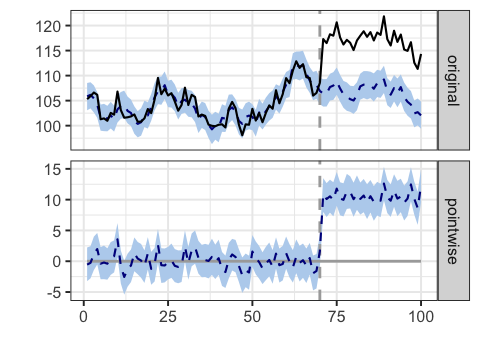

In [27]:
library(repr)
library(ggplot2)
options(repr.plot.width=4, repr.plot.height=3)
impact.plot <- plot(impact,c("original", "pointwise")) + theme_bw(base_size = 12)
plot(impact.plot)

## Model

[[go back to the top]](#Table-of-contents)

Now we use our actual data and the counter-factual data. The `CausalImpact` algorithm can pick the most useful counter-factual series (or group of series) from some given time series data using a spike-and-slab prior distribution on the regression.

Here two others packages are needed, namely, `MarketMatching` and `dtw`. The former wraps `dtw` and `CausalImpact`. Its function `best_matches()` finds the best control markets for each market, looping through all viable candidates then ranking by correlation. We then pass the output to the the `inference()` function which analyzes the causal impact of an event using the control markets.

`MarketMatching` only simplifies the workflow of the other packages.

The data where there was intervention, which is our data is:

       gaDataIntervention <- ga$getData(id, start.date = as.Date("2016-11-03"), 
                             end.date=as.Date("2018-07-01"), 
                             metrics = "ga:transactions,ga:transactionRevenue",
                             dimensions = "ga:date",
                             sort = "ga:date")
                     